In [0]:
import pandas as pd
import numpy as np
from datetime import datetime 

import matplotlib.pyplot as plt
import seaborn as sns
from math import sin, cos, sqrt, atan2, radians
DIMS=(16,6)

In [0]:
maindf = pd.read_csv('https://raw.githubusercontent.com/harditsingh/DataWranglingVU/master/Project/EPL%202000-2018.csv')

### **Data Preparation**

In [0]:
def parse_date(text):
  if type(text) is not str:
    return
  for fmt in ('%d/%m/%y', '%d/%m/%Y'):
      try:
          return datetime.strptime(text, fmt)
      except ValueError:
          pass
  raise ValueError('no valid date format found')


maindf['Date'] = maindf['Date'].apply(parse_date)

maindf.drop(['HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC'], inplace=True, axis=1)

In [0]:
# Cleaning up referee names (wrong spelling)
cleaned_df = maindf.replace(["�A D'Urso", "Andy D'Urso", "Andy D'Urso "], "A D'Urso")
cleaned_df = cleaned_df.replace("�U Rennie", "U Rennie")
cleaned_df = cleaned_df.replace("�C Foy", "C Foy")
cleaned_df = cleaned_df.replace(["�A Wiley","Alan Wiley"], "A Wiley")
cleaned_df = cleaned_df.replace(["�D Gallagher", "Dermot Gallagher", "D Gallagh", "D Gallaghe"], "D Gallagher")
cleaned_df = cleaned_df.replace("�H Webb", "H Webb")
cleaned_df = cleaned_df.replace(["�M Atkinson","Mn Atkinson"], "M Atkinson")
cleaned_df = cleaned_df.replace(["�N Barry", "Neale Barry"], "N Barry")
cleaned_df = cleaned_df.replace(["�S Dunn", "Steve Dunn"], "S Dunn")
cleaned_df = cleaned_df.replace("Graham Barber", "G Barber")
cleaned_df = cleaned_df.replace("Barry Knight", "B Knight")
cleaned_df = cleaned_df.replace("Mike Riley", "M Riley")
cleaned_df = cleaned_df.replace("Paul Durkin", "P Durkin")
cleaned_df = cleaned_df.replace("Graham Poll", "G Poll")
cleaned_df = cleaned_df.replace(["Mark Halsey", "Mark Halsey "], "M Halsey")
cleaned_df = cleaned_df.replace("Jeff Winter", "J Winter")
cleaned_df = cleaned_df.replace("Rob Styles", "R Styles")
cleaned_df = cleaned_df.replace(["Steve Bennett", "Steve Bennett ", "St Bennett"], "S Bennett")
cleaned_df = cleaned_df.replace("Mike Dean", "M Dean")
cleaned_df = cleaned_df.replace("Matt Messias", "M Messias")
cleaned_df = cleaned_df.replace("Clive Wilkes", "C Wilkes")
cleaned_df = cleaned_df.replace("l Mason", "L Mason")

In [0]:
cleaned_df.Referee.unique()

array(['Rob Harris', 'G Barber', 'B Knight', "A D'Urso", 'D Gallagher',
       'M Riley', 'P Durkin', 'S Dunn', 'A Wiley', 'Steve Lodge',
       'G Poll', 'M Halsey', 'J Winter', 'Peter Jones', 'Andy Hall',
       'David Ellaray', 'F Taylor', 'R Styles', 'S Bennett', 'Ian Harris',
       'Paul Taylor', 'N Barry', 'M Dean', 'Roy Burton', 'M Messias',
       'C Wilkes', 'D Elleray', 'U Rennie', 'D Pugh', 'E Wolstenholme',
       'C Foy', 'P Dowd', 'R Martin', 'H Webb', 'P Walton',
       'M Clattenburg', 'M Atkinson', 'P Crossley', 'A Marriner',
       'R Beeby', 'I Williamson', 'L Mason', 'K Stroud', 'S Tanner',
       'L Probert', 'S Attwell', 'M Jones', 'K Friend', 'A Taylor',
       'M Oliver', 'N Swarbrick', 'J Moss', 'R East', 'C Pawson',
       'R Madley', 'P Tierney', 'G Scott', nan, 'S Hooper', 'C Kavanagh',
       'D Coote'], dtype=object)

In [0]:
# Checking if unique teams is correct
print("There are", cleaned_df.HomeTeam.nunique(), "unique teams")
cleaned_df.head(2)


There are 44 unique teams


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HF,AF,HY,AY,HR,AR,Season
0,2000-08-19,Charlton,Man City,4.0,0.0,H,Rob Harris,13.0,12.0,1.0,2.0,0.0,0.0,00-01
1,2000-08-19,Chelsea,West Ham,4.0,2.0,H,G Barber,19.0,14.0,1.0,2.0,0.0,0.0,00-01


In [0]:
# Delete season 00-01
season_00_01 = cleaned_df[ cleaned_df['Season'] == '00-01'].index
 
# Delete these rows indexes from dataFrame
cleaned_df.drop(season_00_01 , inplace=True)

In [0]:
# Goal difference column
cleaned_df['GoalsDifference'] = cleaned_df['FTHG'] - cleaned_df['FTAG']

In [0]:
# Show missing row
null_data = cleaned_df[cleaned_df.isnull().any(axis=1)]
null_data
# Delete row with index label '5320' 
cleaned_df = cleaned_df.drop(5320)

In [0]:
# Checking for missing values
cleaned_df.isnull().sum()
cleaned_df.isnull().values.any()

False

In [0]:
cleaned_df[['FTHG', 'FTAG', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR', 'GoalsDifference']] = cleaned_df[['FTHG', 'FTAG', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR', 'GoalsDifference']].astype(int)

In [0]:
# Checking if seasons are correct
cleaned_df.Season.value_counts()

04-05    380
12-13    380
02-03    380
15-16    380
14-15    380
10-11    380
13-14    380
17-18    380
11-12    380
16-17    380
05-06    380
08-09    380
06-07    380
03-04    380
07-08    380
09-10    380
Name: Season, dtype: int64

### **Data Exploration**

In [0]:
cleaned_df.describe()

,FTHG,FTAG,HF,AF,HY,AY,HR,AR,GoalsDifference
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,1.530263,1.131908,11.389803,11.943750,1.397204,1.759868,0.062993,0.094079,0.398355
std,1.299046,1.127955,3.722532,3.857444,1.178979,1.278558,0.255511,0.303564,1.766664
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,1.000000,0.000000,9.000000,9.000000,0.000000,1.000000,0.000000,0.000000,-1.000000
50%,1.000000,1.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000,1.000000
max,9.000000,7.000000,33.000000,28.000000,7.000000,9.000000,3.000000,2.000000,8.000000


In [0]:
cleaned_df.head(5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HF,AF,HY,AY,HR,AR,Season,GoalsDifference
380,2002-08-17,Blackburn,Sunderland,0,0,D,D Elleray,14,11,1,2,0,0,02-03,0
381,2002-08-17,Charlton,Chelsea,2,3,A,G Barber,10,12,0,3,1,0,02-03,-1
382,2002-08-17,Everton,Tottenham,2,2,D,N Barry,18,4,1,1,0,0,02-03,0
383,2002-08-17,Fulham,Bolton,4,1,H,A Wiley,16,12,1,2,0,0,02-03,3
384,2002-08-17,Leeds,Man City,3,0,H,G Poll,13,13,1,1,0,0,02-03,3


In [0]:
grouped = cleaned_df.groupby('Season')

def foul_count(season):
    
    result_fouls = {}
    
    teams = season['HomeTeam']
    for i in teams:
        
        home_games = season[season['HomeTeam']==i]
        away_games = season[season['AwayTeam']==i]
        
        games = len(home_games) + len(away_games)
        
        home_fouls = home_games['HF'].sum()
        away_fouls = away_games['AF'].sum()
        
        total_fouls = home_fouls + away_fouls
        
        result_fouls[i] = round(total_fouls / games,2)
        
    return result_fouls

In [0]:
result_fouls = grouped.apply(foul_count)
result_fouls

Season
02-03    {'Blackburn': 13.92, 'Charlton': 12.97, 'Evert...
03-04    {'Arsenal': 13.13, 'Birmingham': 13.29, 'Black...
04-05    {'Aston Villa': 15.26, 'Blackburn': 15.61, 'Bo...
05-06    {'Aston Villa': 14.13, 'Everton': 14.08, 'Fulh...
06-07    {'Arsenal': 9.68, 'Bolton': 13.71, 'Everton': ...
07-08    {'Aston Villa': 13.37, 'Bolton': 13.11, 'Derby...
08-09    {'Arsenal': 11.03, 'Bolton': 13.08, 'Everton':...
09-10    {'Aston Villa': 12.11, 'Blackburn': 13.84, 'Bo...
10-11    {'Aston Villa': 11.5, 'Blackburn': 11.97, 'Bol...
11-12    {'Blackburn': 11.18, 'Fulham': 9.21, 'Liverpoo...
12-13    {'Arsenal': 9.47, 'Fulham': 10.11, 'Newcastle'...
13-14    {'Arsenal': 9.16, 'Liverpool': 10.79, 'Norwich...
14-15    {'Arsenal': 9.92, 'Leicester': 12.03, 'Man Uni...
15-16    {'Bournemouth': 9.53, 'Chelsea': 10.74, 'Evert...
16-17    {'Burnley': 11.21, 'Crystal Palace': 12.34, 'E...
17-18    {'Arsenal': 10.08, 'Brighton': 10.87, 'Chelsea...
dtype: object

In [0]:
# Rank team with highest foul for seasons
foul_rate_list = []

for i in result_fouls:
    n = max(zip(i.values(),i.keys()))
    foul_rate_list.append(n)

foul_rate_list

[(14.39, 'Leeds'),
 (14.84, 'Tottenham'),
 (15.61, 'Blackburn'),
 (15.79, 'Newcastle'),
 (14.79, 'Watford'),
 (13.97, 'Blackburn'),
 (14.03, 'Hull'),
 (13.84, 'Blackburn'),
 (12.63, 'Bolton'),
 (11.82, 'Everton'),
 (11.71, 'West Ham'),
 (12.76, 'Stoke'),
 (13.87, 'Crystal Palace'),
 (12.42, 'Man United'),
 (13.61, 'Watford'),
 (12.08, 'Everton')]

### **Insights**

## **Average Scoring Margin**

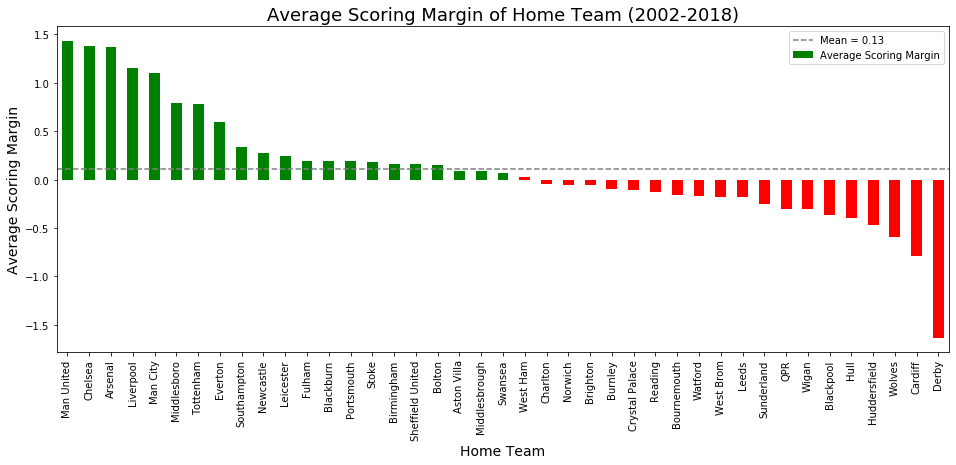

In [0]:
# Goal Difference equals to number of hometeam goals minus number of awayteam goals
margin_score = cleaned_df.groupby(['HomeTeam']).agg({'GoalsDifference': ['sum','size']})
margin_score = margin_score.reset_index()
margin_score.columns = margin_score.columns.droplevel(level=0)
# print(margin_score)

# Scoring Margin is the average difference between the number of goals scored by the home and away team 
# A positive Scoring Margin = home team scores more than away team
margin_score['AverageScoringMargin'] = margin_score['sum']/margin_score['size']
result_score = margin_score.sort_values(['AverageScoringMargin'], ascending = False)

# Show bar chart 
fig, ax = plt.subplots() 
team_list = []
for x in list(result_score['AverageScoringMargin']):
    if round(x,1) <= 0:
        team_list.append('red')
    else:
        team_list.append('green')
result_score.plot(x='', y = "AverageScoringMargin", kind='bar',ax=ax, figsize=DIMS, color=team_list, label = 'Average Scoring Margin')
ax.set_title('Average Scoring Margin of Home Team (2002-2018)', fontsize = 18)
ax.set_ylabel('Average Scoring Margin', fontsize = 14)
ax.set_xlabel('Home Team', fontsize = 14)
plt.axhline(y=result_score["AverageScoringMargin"].mean(),color='gray',linestyle='--', label='Mean = 0.13')
legend = ax.legend(loc='upper right')
ax.grid(False)
plt.show()

In [0]:
# Checking for correctness
result_score.head(5)

,,sum,size,AverageScoringMargin
22,Man United,435,304,1.430921
11,Chelsea,419,304,1.378289
0,Arsenal,417,304,1.371711
20,Liverpool,352,304,1.157895
21,Man City,334,304,1.098684


## **Referee**

## **Average Foul Margin**

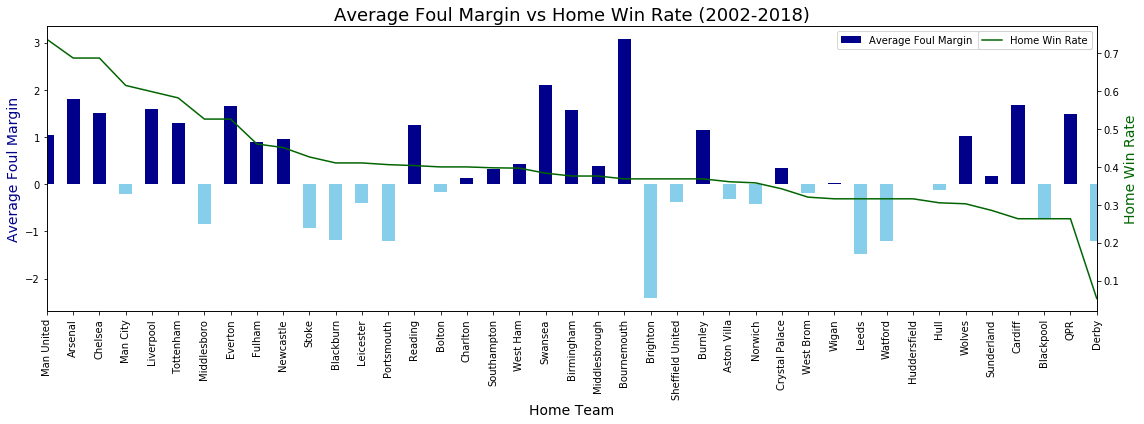

In [0]:
# The FoulDifference refers to the number of fouls committed by hometeam minus the number of fouls by the awayteam
cleaned_df['FoulDifference'] = cleaned_df['AF'] - cleaned_df['HF']
margin_foul = cleaned_df.groupby(['HomeTeam']).agg({'FoulDifference': ['sum','size']})
margin_foul = margin_foul.reset_index()
margin_foul.columns = margin_foul.columns.droplevel(level=0)

# The more positive the foul margin, the higher the number of away fouls committed compared to the home fouls
margin_foul['AverageFoulMargin'] = margin_foul['sum']/margin_foul['size']

# Calculating the win rate of each seperate team
winrate = cleaned_df.copy()
aggregate_winrate = winrate.groupby(['HomeTeam', 'FTR']).size().reset_index(name="No. of teams")
result_winrate = pd.pivot_table(aggregate_winrate, index=['HomeTeam'], columns=['FTR'],
                                        values='No. of teams', aggfunc=np.sum)
result_winrate = result_winrate.reset_index()
result_winrate['HomeWinRate'] = result_winrate['H'] / (result_winrate['H'] + result_winrate['A'] + result_winrate['D'])
result_winrate = result_winrate.sort_values(['HomeWinRate'], ascending = False)

margin_foul['HomeWinRate'] = result_winrate['H'] / (result_winrate['H'] + result_winrate['A'] + result_winrate['D'])
margin_foul = margin_foul.sort_values(['HomeWinRate'], ascending = False)

margin_foul['positive'] = margin_foul['AverageFoulMargin'] > 0

# Plotting bar chart (average foul margin)
fig, ax = plt.subplots()
margin_foul.plot(x='', y = "AverageFoulMargin", kind='bar',ax=ax, figsize=DIMS, color=margin_foul.positive.map({True: 'darkblue', False: 'skyblue'}), rot = 90)
ax.set_title('Average Foul Margin vs Home Win Rate (2002-2018)', fontsize = 18)
ax.set_ylabel('Average Foul Margin', color ='darkblue', fontsize = 14)
ax.set_xlabel('Home Team', fontsize = 14)

# Plotting line graph (win rate)
ax_new = ax.twinx()
result_winrate.plot(x='HomeTeam',y = "HomeWinRate", kind='line',ax=ax_new, figsize=DIMS, color='darkgreen')
ax_new.set_ylabel('Home Win Rate', color = 'darkgreen', fontsize = 14)
ax.legend(['Average Foul Margin                                     '])
ax_new.legend(['Home Win Rate'])
ax_new.grid(False)
fig.tight_layout()
plt.show()

## **Yellow Card Margin**

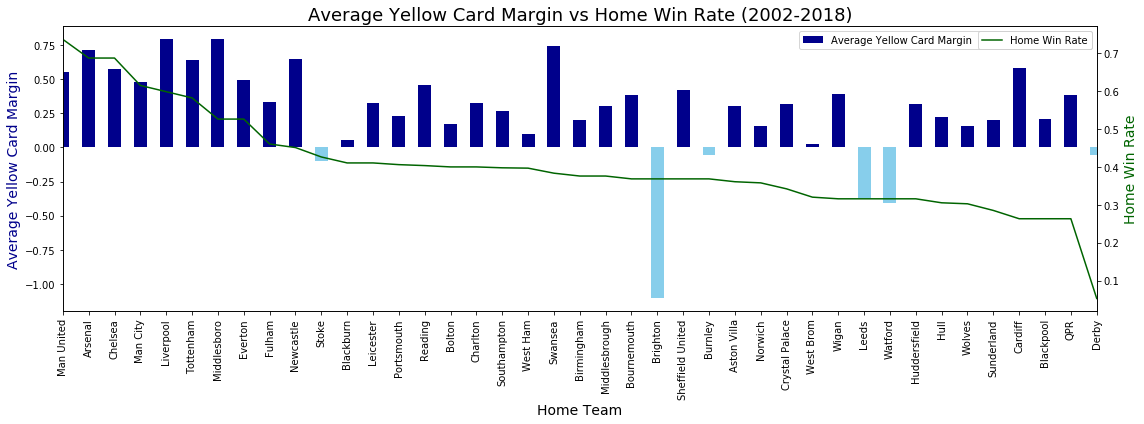

In [0]:
# YellowDifference refers to the number of yellow cards by awayteam minus number of yellow cards by hometeam
cleaned_df['YellowDifference'] = cleaned_df['AY'] - cleaned_df['HY']
margin_yellow_card = cleaned_df.groupby(['HomeTeam']).agg({'YellowDifference': ['sum','size']})
margin_yellow_card = margin_yellow_card.reset_index()
margin_yellow_card.columns = margin_yellow_card.columns.droplevel(level=0)

# The more positive the yellow card margin, the higher the number of awayteam yellow cards compared to the hometeam yellow cards
margin_yellow_card['AverageYellowMargin'] = margin_yellow_card['sum']/margin_yellow_card['size']
margin_yellow_card['HomeWinRate'] = result_winrate['H'] / (result_winrate['H'] + result_winrate['A'] + result_winrate['D'])
margin_yellow_card = margin_yellow_card.sort_values(['HomeWinRate'], ascending = False)

margin_yellow_card['positive'] = margin_yellow_card['AverageYellowMargin'] > 0

# Plotting bar chart  (yellow card margin)
fig, ax = plt.subplots()
margin_yellow_card.plot(x='', y = "AverageYellowMargin", kind='bar',ax=ax, figsize=DIMS, color=margin_yellow_card.positive.map({True: 'darkblue', False: 'skyblue'}), rot = 90)
ax.set_title('Average Yellow Card Margin vs Home Win Rate (2002-2018)', fontsize = 18)
ax.set_ylabel('Average Yellow Card Margin', color ='darkblue', fontsize = 14)
ax.set_xlabel('Home Team', fontsize = 14)

# Plotting line graph (win rate)
ax_new = ax.twinx()
result_winrate.plot(x='HomeTeam',y = "HomeWinRate", kind='line',ax=ax_new, figsize=DIMS, color='darkgreen')
ax_new.set_ylabel('Home Win Rate', color = 'darkgreen', fontsize = 14)
ax.legend(['Average Yellow Card Margin                                     '])
ax_new.legend(['Home Win Rate'])
ax_new.grid(False)
fig.tight_layout()
plt.show()

## **Red Card Margin**

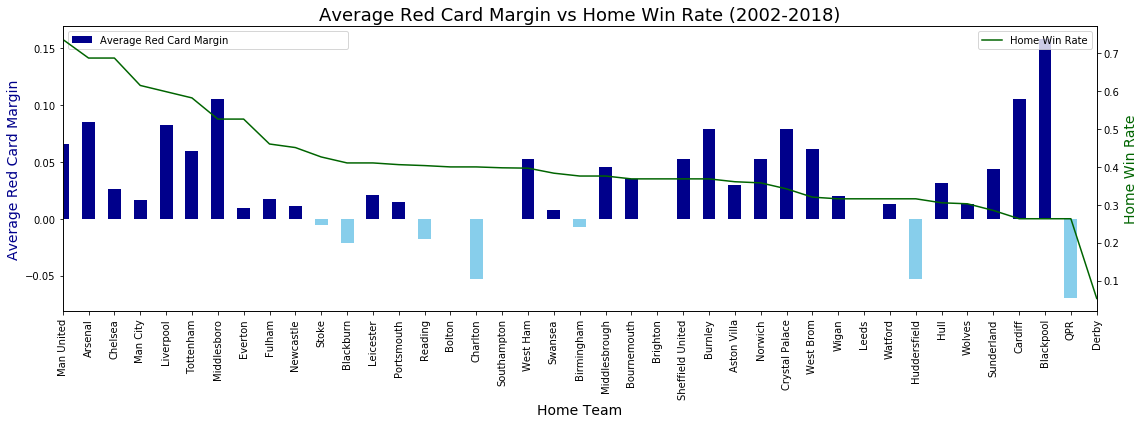

In [0]:
# RedDifference refers to the number of red cards by awayteam minus number of red cards by hometeam
cleaned_df['RedDifference'] = cleaned_df['AR'] - cleaned_df['HR']
margin_red_card = cleaned_df.groupby(['HomeTeam']).agg({'RedDifference': ['sum','size']})
margin_red_card = margin_red_card.reset_index()
margin_red_card.columns = margin_red_card.columns.droplevel(level=0)

# The more positive the red card margin, the higher the number of awayteam red cards compared to the hometeam red cards
margin_red_card['AverageRedMargin'] = margin_red_card['sum']/margin_red_card['size']
margin_red_card['HomeWinRate'] = result_winrate['H'] / (result_winrate['H'] + result_winrate['A'] + result_winrate['D'])
margin_red_card = margin_red_card.sort_values(['HomeWinRate'], ascending = False)


margin_red_card['positive'] = margin_red_card['AverageRedMargin'] > 0

# Plotting bar chart  (red card margin)
fig, ax = plt.subplots()
margin_red_card.plot(x='', y = "AverageRedMargin", kind='bar',ax=ax, figsize=DIMS, color=margin_red_card.positive.map({True: 'darkblue', False: 'skyblue'}), rot = 90)
ax.set_title('Average Red Card Margin vs Home Win Rate (2002-2018)', fontsize = 18)
ax.set_ylabel('Average Red Card Margin', color ='darkblue', fontsize = 14)
ax.set_xlabel('Home Team', fontsize = 14)

# Plotting line graph (win rate)
ax_new = ax.twinx()
result_winrate.plot(x='HomeTeam',y = "HomeWinRate", kind='line',ax=ax_new, figsize=DIMS, color='darkgreen')
ax_new.set_ylabel('Home Win Rate', color = 'darkgreen', fontsize = 14)
ax.legend(['Average Red Card Margin                                     '])
ax_new.legend(['Home Win Rate'])
ax_new.grid(False)
fig.tight_layout()
plt.show()

In [0]:
# Checking if done correct
margin_red_card.head(5)

,,sum,size,AverageRedMargin,HomeWinRate,positive
22,Man United,20,304,0.065789,0.736842,True
0,Arsenal,26,304,0.085526,0.687500,True
11,Chelsea,8,304,0.026316,0.687500,True
21,Man City,5,304,0.016447,0.615132,True
20,Liverpool,25,304,0.082237,0.598684,True


## **Referee Bias**

In [0]:
cleaned_df['RefereeBias'] = (cleaned_df['AY'] + 2 * cleaned_df['AR']) - (cleaned_df['HY'] + 2* cleaned_df['HR'])
referee_reputation = cleaned_df.groupby(['Referee']).agg({'RefereeBias': ['sum','size']})
referee_reputation = referee_reputation.reset_index()
referee_reputation.columns = referee_reputation.columns.droplevel(level=0)

referee_reputation['AverageRefereeReputation'] = referee_reputation['sum']/referee_reputation['size']
referee_reputation = referee_reputation.sort_values(by=['AverageRefereeReputation'],ascending=False)
referee_reputation.columns =['Referee', 'sum', 'size', 'RefereeReputation'] 
referee_reputation.head(5)

,Referee,sum,size,RefereeReputation
9,D Coote,2,1,2.000000
49,S Tanner,28,26,1.076923
40,R Beeby,3,3,1.000000
8,C Wilkes,8,8,1.000000
12,D Pugh,5,5,1.000000


In [0]:
# Only giving trusted score to experiences referees (more than 10 games)
updated_referee = referee_reputation[referee_reputation['size'] > 10] 
#updated_referee 

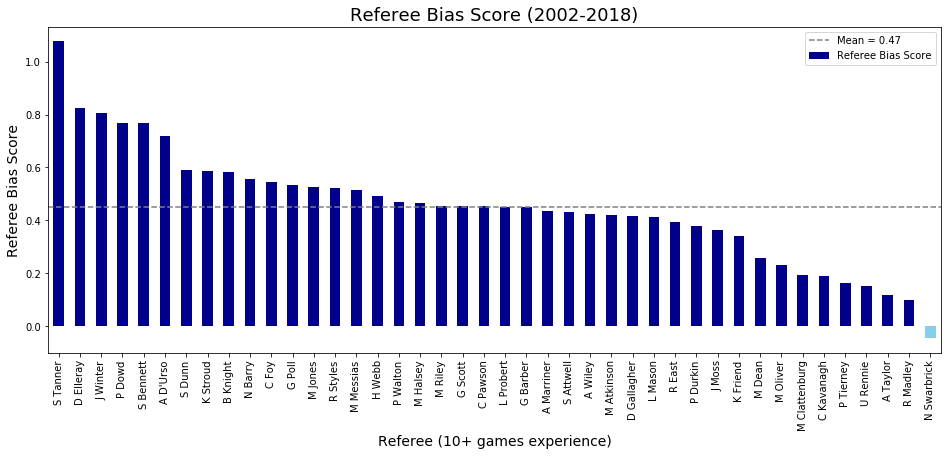

In [0]:
# Plot the bar chart (referee bias)
fig, ax = plt.subplots() 
clrs = []
for i in list(updated_referee['RefereeReputation']):
    if round(i,1) <= 0:
        clrs.append('skyblue')
    else:
        clrs.append('darkblue')
#plt.ylim(-0.5, 1.5)
updated_referee.plot(x='Referee', y = "RefereeReputation", kind='bar',ax=ax, figsize=DIMS, color=clrs, label = 'Referee Bias Score')
ax.set_title('Referee Bias Score (2002-2018)', fontsize = 18)
ax.set_ylabel('Referee Bias Score', fontsize = 14)
ax.set_xlabel('Referee (10+ games experience)', fontsize = 14)
plt.axhline(y=updated_referee["RefereeReputation"].mean(),color='gray',linestyle='--', label='Mean = 0.47')
legend = ax.legend(loc='upper right')
ax.grid(False)
plt.show()

In [0]:
# Check if inexperienced referee got deleted
cleaned_df.loc[cleaned_df['Referee'] == 'Roy Burton']

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HF,AF,HY,AY,HR,AR,Season,GoalsDifference,FoulDifference,YellowDifference,RedDifference,RefereeBias


In [0]:
# Merging
cleaned_df = pd.merge(cleaned_df, referee_reputation, how='left')
#cleaned_df = cleaned_df.sort_index(axis = 0)
cleaned_df.head(5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HF,AF,HY,AY,HR,AR,Season,GoalsDifference,FoulDifference,YellowDifference,RedDifference,RefereeBias,sum,size,RefereeReputation
0,2002-08-17,Blackburn,Sunderland,0,0,D,D Elleray,14,11,1,2,0,0,02-03,0,-3,1,0,1,14,17,0.823529
1,2002-08-17,Charlton,Chelsea,2,3,A,G Barber,10,12,0,3,1,0,02-03,-1,2,3,-1,1,18,40,0.450000
2,2002-08-17,Everton,Tottenham,2,2,D,N Barry,18,4,1,1,0,0,02-03,0,-14,0,0,0,34,61,0.557377
3,2002-08-17,Fulham,Bolton,4,1,H,A Wiley,16,12,1,2,0,0,02-03,3,-4,1,0,1,88,207,0.425121
4,2002-08-17,Leeds,Man City,3,0,H,G Poll,13,13,1,1,0,0,02-03,3,0,0,0,0,74,139,0.532374


## **Season Home Goals vs Away Goals**

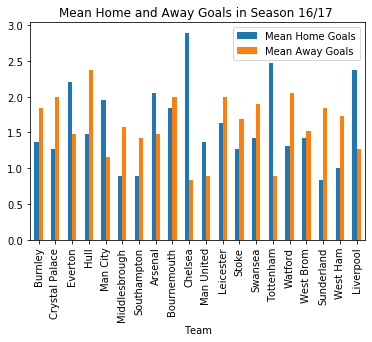

In [0]:
# Checking for mean home goals vs mean away goals for season 16/17
Season16_17 = cleaned_df[cleaned_df['Season'] == '16-17']
team_list = cleaned_df[cleaned_df['Season'] == '16-17']['HomeTeam'].unique()

home_points_list = []
away_points_list = []
for i in team_list:
    hometeam_df = Season16_17[Season16_17['HomeTeam'] == i]
    awayteam_df = Season16_17[Season16_17['AwayTeam'] == i]
    hometeam = hometeam_df['HomeTeam'] == i
    awayteam = awayteam_df['AwayTeam'] == i
    home_points_list.append(hometeam_df.loc[hometeam,'FTHG'].mean())
    away_points_list.append(awayteam_df.loc[awayteam, 'FTHG'].mean())
dataframe = pd.DataFrame({'Team':team_list,'Mean Home Goals': home_points_list,'Mean Away Goals' : away_points_list})
dataframe.set_index('Team', inplace=True)
dataframe.plot(kind='bar',title='Mean Home and Away Goals in Season 16/17 ')

In [0]:
cleaned_df.head(5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HF,AF,HY,AY,HR,AR,Season,GoalsDifference,FoulDifference,YellowDifference,RedDifference,RefereeBias,sum,size,RefereeReputation
0,2002-08-17,Blackburn,Sunderland,0,0,D,D Elleray,14,11,1,2,0,0,02-03,0,-3,1,0,1,14,17,0.823529
1,2002-08-17,Charlton,Chelsea,2,3,A,G Barber,10,12,0,3,1,0,02-03,-1,2,3,-1,1,18,40,0.450000
2,2002-08-17,Everton,Tottenham,2,2,D,N Barry,18,4,1,1,0,0,02-03,0,-14,0,0,0,34,61,0.557377
3,2002-08-17,Fulham,Bolton,4,1,H,A Wiley,16,12,1,2,0,0,02-03,3,-4,1,0,1,88,207,0.425121
4,2002-08-17,Leeds,Man City,3,0,H,G Poll,13,13,1,1,0,0,02-03,3,0,0,0,0,74,139,0.532374


In [0]:
season_stats_23 = cleaned_df.loc[cleaned_df['Season'] == '02-03'] 
season_stats_34 = cleaned_df.loc[cleaned_df['Season'] == '03-04']                    
season_stats_45 = cleaned_df.loc[cleaned_df['Season'] == '04-05']  
season_stats_56 = cleaned_df.loc[cleaned_df['Season'] == '05-06'] 
season_stats_67 = cleaned_df.loc[cleaned_df['Season'] == '06-07']                    
season_stats_78 = cleaned_df.loc[cleaned_df['Season'] == '07-08']  
season_stats_89 = cleaned_df.loc[cleaned_df['Season'] == '08-09'] 
season_stats_910 = cleaned_df.loc[cleaned_df['Season'] == '09-10']                    
season_stats_1011 = cleaned_df.loc[cleaned_df['Season'] == '10-11']  
season_stats_1112 = cleaned_df.loc[cleaned_df['Season'] == '11-12'] 
season_stats_1213 = cleaned_df.loc[cleaned_df['Season'] == '12-13']                    
season_stats_1314 = cleaned_df.loc[cleaned_df['Season'] == '13-14']  
season_stats_1415 = cleaned_df.loc[cleaned_df['Season'] == '14-15'] 
season_stats_1516 = cleaned_df.loc[cleaned_df['Season'] == '15-16']                    
season_stats_1617 = cleaned_df.loc[cleaned_df['Season'] == '16-17']  
season_stats_1718 = cleaned_df.loc[cleaned_df['Season'] == '17-18'] 

Text(0, 0.5, 'Total')

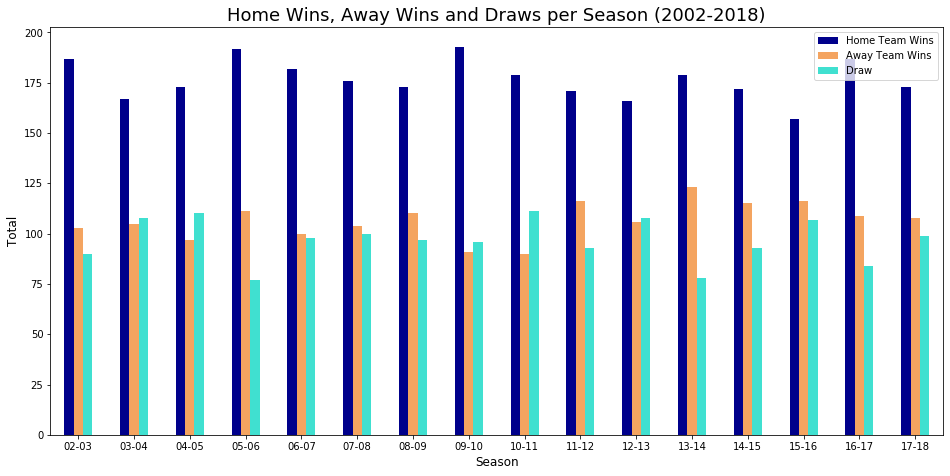

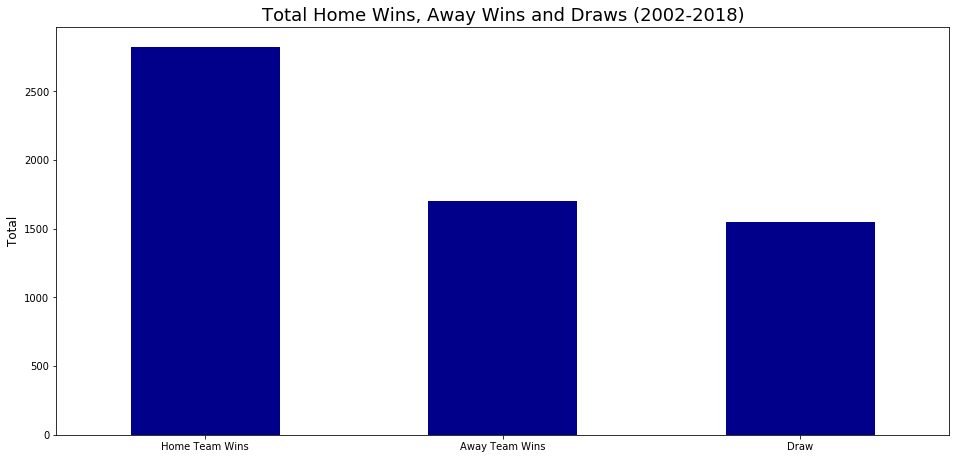

In [0]:
def season_results(playing_stats, year):
    return pd.DataFrame(data = [ len(playing_stats[playing_stats.FTR == 'H']),
                                 len(playing_stats[playing_stats.FTR == 'A']),
                                 len(playing_stats[playing_stats.FTR == 'D'])],
                                index = ['Home Team Wins', 'Away Team Wins', 'Draw'], columns =[year]).T

season_aggregated = season_results(cleaned_df, 'Overall')
season_23 = season_results(season_stats_23, '02-03')
season_34 = season_results(season_stats_34, '03-04')
season_45 = season_results(season_stats_45, '04-05')
season_56 = season_results(season_stats_56, '05-06')
season_67 = season_results(season_stats_67, '06-07')
season_78 = season_results(season_stats_78, '07-08')
season_89 = season_results(season_stats_89, '08-09')
season_910 = season_results(season_stats_910, '09-10')
season_1011 = season_results(season_stats_1011, '10-11')
season_1112 = season_results(season_stats_1112, '11-12')
season_1213 = season_results(season_stats_1213, '12-13')
season_1314 = season_results(season_stats_1314, '13-14')
season_1415 = season_results(season_stats_1415, '14-15')
season_1516 = season_results(season_stats_1516, '15-16')
season_1617 = season_results(season_stats_1617, '16-17')
season_1718 = season_results(season_stats_1718, '17-18')

season_stats = pd.concat([season_23, season_34, season_45,
                          season_56, season_67, season_78, season_89, season_910,
                          season_1011, season_1112, season_1213, season_1314, season_1415,
                          season_1516, season_1617, season_1718])

# Plotting home wins, away wins and draws
ax = season_stats.plot(kind='bar', color = ['darkblue','sandybrown', 'turquoise'], figsize = [16,7.5])
ax.set_title('Home Wins, Away Wins and Draws per Season (2002-2018)', size=18)
plt.xticks(rotation=0)
ax.set_ylabel('Total', size=12)
ax.set_xlabel('Season', size=12)

# Plotting aggregated result dataframe
ax_new = season_aggregated.T.plot(kind='bar', color=['darkblue'], figsize = [16,7.5], 
                      legend = False)
ax_new.set_title('Total Home Wins, Away Wins and Draws (2002-2018)', size=18)

plt.xticks(rotation=0)
ax_new.set_ylabel('Total', size=12)

In [0]:
# Checking for correctness (each season)
season_stats.head(5)

,Home Team Wins,Away Team Wins,Draw
02-03,187,103,90
03-04,167,105,108
04-05,173,97,110
05-06,192,111,77
06-07,182,100,98


In [0]:
season_aggregated

,Home Team Wins,Away Team Wins,Draw
Overall,2827,1704,1549


In [0]:
slicing_season = season_stats.T

for i in slicing_season.columns:
    slicing_season[i] = (slicing_season[i] * 100) / 380  

# Renaming the columns
slicing_season.rename(index={'Home Wins':'Home', 'Away Wins':'Away', 'Draws':'Draw'}, inplace=True)
slicing_season

,02-03,03-04,04-05,05-06,06-07,07-08,08-09,09-10,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18
Home Team Wins,49.210526,43.947368,45.526316,50.526316,47.894737,46.315789,45.526316,50.789474,47.105263,45.000000,43.684211,47.105263,45.263158,41.315789,49.210526,45.526316
Away Team Wins,27.105263,27.631579,25.526316,29.210526,26.315789,27.368421,28.947368,23.947368,23.684211,30.526316,27.894737,32.368421,30.263158,30.526316,28.684211,28.421053
Draw,23.684211,28.421053,28.947368,20.263158,25.789474,26.315789,25.526316,25.263158,29.210526,24.473684,28.421053,20.526316,24.473684,28.157895,22.105263,26.052632


([<matplotlib.axis.XTick at 0x7f35e9e97f98>,
 <a list of 16 Text xticklabel objects>)

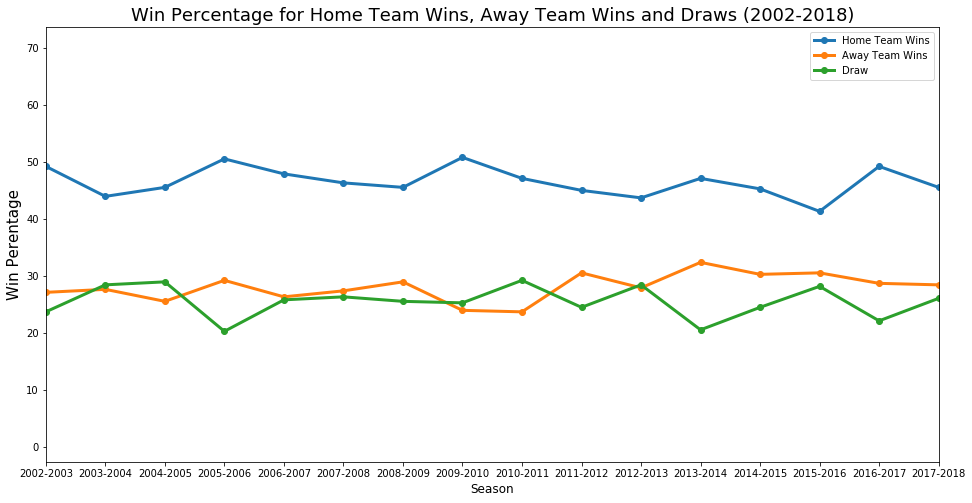

In [0]:
# Plotting line plot of the win percentages for all the different seasons in dataframe
ax = slicing_season.T.plot(figsize = [16,8], marker = 'o', linewidth = 3)
ax.margins(y=.75)
ax.set_title('Win Percentage for Home Team Wins, Away Team Wins and Draws (2002-2018)', size=18)
ax.set_xlabel('Season', size =12)
ax.set_ylabel('Win Perentage', size =15)
# Set season labels
plt.xticks( np.arange(16), ('2002-2003', '2003-2004', '2004-2005', '2005-2006', '2006-2007', '2007-2008', '2008-2009', '2009-2010',
                            '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018') )

,Win Percentage
Home Team Wins,46.496711
Away Team Wins,28.026316
Draw,25.476974


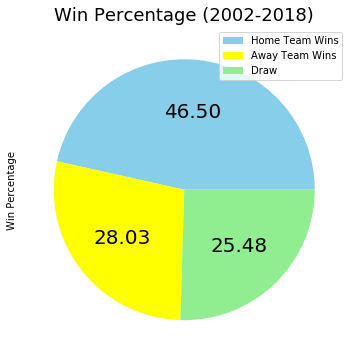

In [0]:
# Calculating the average win percentage for the pie chart
result_average_season = pd.DataFrame((slicing_season['02-03'] + slicing_season['03-04'] + slicing_season['04-05'] +
                                slicing_season['05-06'] + slicing_season['06-07'] + slicing_season['07-08'] +
                                slicing_season['08-09'] + slicing_season['09-10'] + slicing_season['10-11'] + 
                                slicing_season['11-12'] + slicing_season['12-13'] + slicing_season['13-14'] + 
                                slicing_season['14-15'] + slicing_season['15-16'] + slicing_season['16-17'] + slicing_season['17-18']) / 16, 
                                columns = ['Win Percentage'])

# Plotting average win percentage
ax = result_average_season.plot(kind='pie', figsize =[6,6],autopct='%.2f', y='Win Percentage', fontsize =20, labels = None,
                          legend = True, colors = ['skyblue','yellow', 'lightgreen'])
ax.set_title('Win Percentage (2002-2018)', size=18)
result_average_season

## **Late Season**

In [0]:
# Setting months
cleaned_df['Month'] = pd.DatetimeIndex(cleaned_df['Date']).month.astype(int)

# Ending season if month is 5 or 6 (April - May)
cleaned_df['EndingSeason'] = np.where(((cleaned_df['Month']== 5) | (cleaned_df['Month']== 4 )), 'Yes', 'No')

# Checking if EndingSeason is set to 'Yes' correctly
cleaned_df.loc[cleaned_df['Month'] == 4].head(5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HF,AF,HY,AY,HR,AR,Season,GoalsDifference,FoulDifference,YellowDifference,RedDifference,RefereeBias,sum,size,RefereeReputation,Month,EndingSeason
310,2003-04-05,Aston Villa,Arsenal,1,1,D,U Rennie,19,12,1,2,0,0,02-03,0,-7,1,0,1,15,100,0.150000,4,Yes
311,2003-04-05,Bolton,Man City,2,0,H,C Wilkes,6,10,0,5,0,0,02-03,2,4,5,0,5,8,8,1.000000,4,Yes
312,2003-04-05,Charlton,Leeds,1,6,A,E Wolstenholme,14,17,2,1,0,0,02-03,-5,3,-1,0,-1,3,9,0.333333,4,Yes
313,2003-04-05,Man United,Liverpool,4,0,H,M Riley,15,17,1,3,0,1,02-03,4,2,2,1,4,77,169,0.455621,4,Yes
314,2003-04-05,Middlesboro,West Brom,3,0,H,M Halsey,9,15,0,1,0,0,02-03,3,6,1,0,1,106,228,0.464912,4,Yes


In [0]:
# New dataframe with early season (August - March)
early_season = cleaned_df[cleaned_df['EndingSeason'] == 'No']
early_season.head(2)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HF,AF,HY,AY,HR,AR,Season,GoalsDifference,FoulDifference,YellowDifference,RedDifference,RefereeBias,sum,size,RefereeReputation,Month,EndingSeason
0,2002-08-17,Blackburn,Sunderland,0,0,D,D Elleray,14,11,1,2,0,0,02-03,0,-3,1,0,1,14,17,0.823529,8,No
1,2002-08-17,Charlton,Chelsea,2,3,A,G Barber,10,12,0,3,1,0,02-03,-1,2,3,-1,1,18,40,0.450000,8,No


In [0]:
# New dataframe with late season 
late_season = cleaned_df[cleaned_df['EndingSeason'] == 'Yes']
late_season_2015 = late_season[late_season['Season'] == '15-16']
late_season_2015.head(2)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HF,AF,HY,AY,HR,AR,Season,GoalsDifference,FoulDifference,YellowDifference,RedDifference,RefereeBias,sum,size,RefereeReputation,Month,EndingSeason
5243,2016-04-02,Arsenal,Watford,4,0,H,A Taylor,7,10,1,1,0,0,15-16,4,3,0,0,0,23,194,0.118557,4,Yes
5244,2016-04-02,Aston Villa,Chelsea,0,4,A,N Swarbrick,12,8,4,1,1,0,15-16,-4,-4,-3,-1,-5,-6,132,-0.045455,4,Yes


In [0]:
# Calculate the win rate of each team
winrate_late = late_season_2015.copy()
winrate_aggregate_late = winrate_late.groupby(['HomeTeam', 'FTR']).size().reset_index(name="Number of teams")
result_winrate_late = pd.pivot_table(winrate_aggregate_late, index=['HomeTeam'], columns=['FTR'],
                                        values='Number of teams', aggfunc=np.sum)
result_winrate_late = result_winrate_late.reset_index()
result_winrate_late.fillna(0, inplace=True)
result_winrate_late['HomeWinRate'] = result_winrate_late['H'] / (result_winrate_late['H'] + result_winrate_late['A'] + result_winrate_late['D'])
result_winrate_late = result_winrate_late.sort_values(['HomeWinRate'], ascending = False)
result_winrate_late.head(2)

FTR,HomeTeam,A,D,H,HomeWinRate
12,Southampton,0.0,0.0,3.0,1.0
0,Arsenal,0.0,1.0,4.0,0.8


In [0]:
result_winrate_late.drop(['A', 'D', 'H'], inplace=True, axis=1)

In [0]:
# New dataframe with early season 
early_season = cleaned_df[cleaned_df['EndingSeason'] == 'No']
early_season_2015 = early_season[early_season['Season'] == '15-16']
early_season_2015.head(2)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HF,AF,HY,AY,HR,AR,Season,GoalsDifference,FoulDifference,YellowDifference,RedDifference,RefereeBias,sum,size,RefereeReputation,Month,EndingSeason
4940,2015-08-08,Bournemouth,Aston Villa,0,1,A,M Clattenburg,13,13,3,4,0,0,15-16,-1,0,1,0,1,57,293,0.194539,8,No
4941,2015-08-08,Chelsea,Swansea,2,2,D,M Oliver,15,16,1,3,1,0,15-16,0,1,2,-1,0,47,204,0.230392,8,No


In [0]:
# Calculate the win rate of each team
winrate_early = early_season_2015.copy()
winrate_aggregate_early = winrate_early.groupby(['HomeTeam', 'FTR']).size().reset_index(name="Number of teams")
result_winrate_early = pd.pivot_table(winrate_aggregate_early, index=['HomeTeam'], columns=['FTR'],
                                        values='Number of teams', aggfunc=np.sum)
result_winrate_early = result_winrate_early.reset_index()
result_winrate_early.fillna(0, inplace=True)
result_winrate_early['HomeWinRate'] = result_winrate_early['H'] / (result_winrate_early['H'] + result_winrate_early['A'] + result_winrate_early['D'])
result_winrate_early = result_winrate_early.sort_values(['HomeWinRate'], ascending = False)
result_winrate_early.head(2)

FTR,HomeTeam,A,D,H,HomeWinRate
8,Man City,5,1,10,0.625
6,Leicester,1,5,9,0.600


In [0]:
# Dropping columns
result_winrate_early.drop(['A', 'D', 'H'], inplace=True, axis=1)

In [0]:
result_winrate_early['HomeWinRateLate'] = result_winrate_late['HomeWinRate']
result_winrate_early['HomeWinRateEarly'] = result_winrate_early['HomeWinRate']
result_winrate_early.drop(['HomeWinRate'], inplace=True, axis=1)
result = result_winrate_early

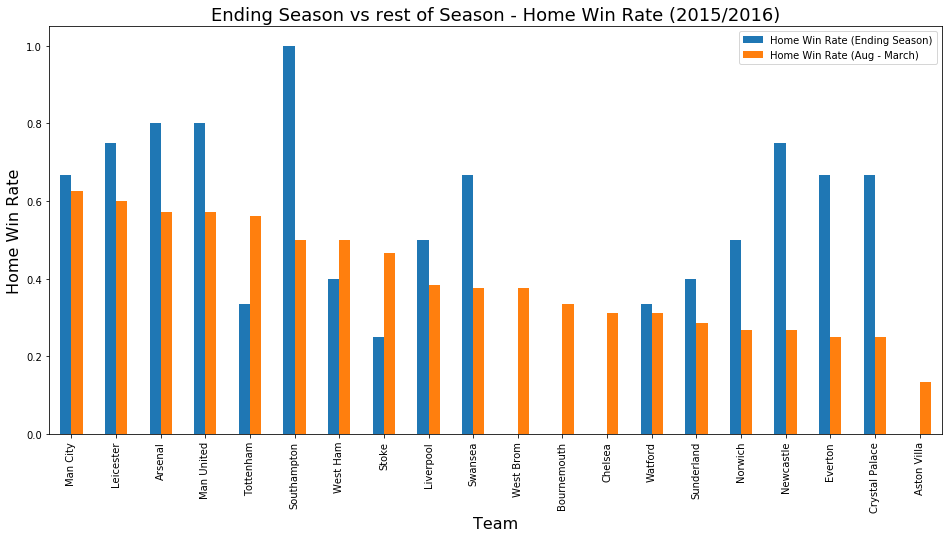

In [0]:
# Plotting graph ending season vs rest of season
ax = result.plot.bar(x='HomeTeam', y=["HomeWinRateLate", "HomeWinRateEarly"], rot=0, label = ("Home Win Rate (Ending Season)", "Home Win Rate (Aug - March)"), figsize = [16,7.5])
plt.xticks(rotation=90)
plt.xlabel('Team', fontsize=16)
plt.ylabel('Home Win Rate', fontsize=16)
plt.title('Ending Season vs rest of Season - Home Win Rate (2015/2016)',fontsize=18)
plt.legend()

In [0]:
arrest_df = pd.read_csv('https://raw.githubusercontent.com/harditsingh/DataWranglingVU/master/Project/arrests_final.csv')

In [0]:
arrest_df_2015 = arrest_df[arrest_df['Season'] == '2015-16']
arrest_df_2015.columns = arrest_df_2015.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
arrest_df_2015.sort_values("home", axis = 0, ascending = False, inplace = True) 
arrest_df_2015.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,season,club,total,home,away,neutral,violentdisorder,publicdisorder,throwingmissiles,chanting,pitchincursion,alcoholoffences,tickettouting,weaponpossession,pyrotechnicspossession,breachofbo,criminaldamage
21,2015-16,Arsenal,42,22,19,1,7,14,8,0,1,5,1,0,2,0,4
34,2015-16,Sunderland,44,22,22,0,3,9,1,4,15,10,0,0,2,0,0
22,2015-16,Aston Villa,41,20,21,0,8,10,5,0,2,11,0,0,1,2,2
36,2015-16,Tottenham Hotspur,33,18,15,0,6,12,2,0,1,3,5,1,3,0,0
26,2015-16,Leicester City,32,17,15,0,6,10,0,1,8,1,0,0,3,1,2


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


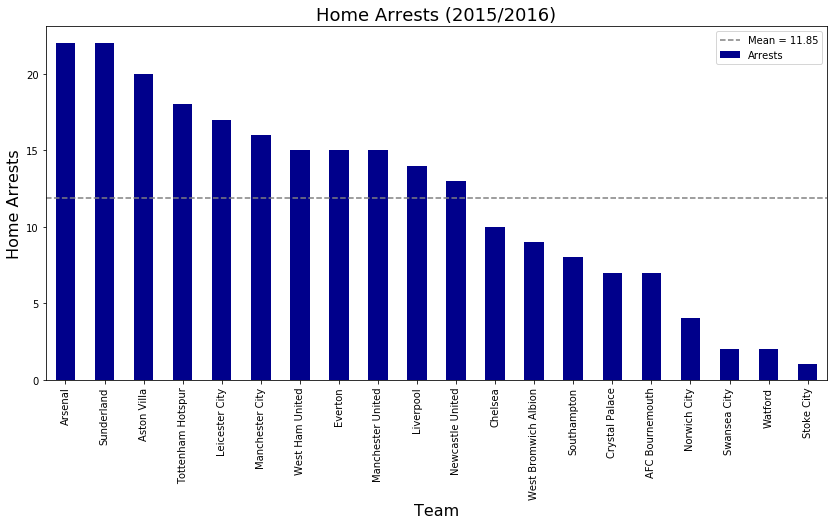

In [0]:
# Plotting graph for home arrests in season 2015/2016
ax = arrest_df_2015.plot.bar(x='club', y='home', rot=0, label = ("Arrests"), figsize = [14,6.5], colors = 'darkblue')
plt.xticks(rotation=90)
plt.xlabel('Team', fontsize=16)
plt.axhline(y=arrest_df_2015["home"].mean(),color='gray',linestyle='--', label='Mean = 11.85')
plt.ylabel('Home Arrests', fontsize=16)
plt.title('Home Arrests (2015/2016)',fontsize=18)
plt.legend()

In [0]:
# Final Dataframe
final_df = cleaned_df.drop(columns=['sum', 'size', 'Month', 'RefereeBias'])
final_df = final_df.rename({'GoalsDifference': 'GoalDifference', 'RefereeReputation': 'RefereeBiasScore'}, axis=1) 
final_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Referee,HF,AF,HY,AY,HR,AR,Season,GoalDifference,FoulDifference,YellowDifference,RedDifference,RefereeBiasScore,EndingSeason
0,2002-08-17,Blackburn,Sunderland,0,0,D,D Elleray,14,11,1,2,0,0,02-03,0,-3,1,0,0.823529,No
1,2002-08-17,Charlton,Chelsea,2,3,A,G Barber,10,12,0,3,1,0,02-03,-1,2,3,-1,0.450000,No
2,2002-08-17,Everton,Tottenham,2,2,D,N Barry,18,4,1,1,0,0,02-03,0,-14,0,0,0.557377,No
3,2002-08-17,Fulham,Bolton,4,1,H,A Wiley,16,12,1,2,0,0,02-03,3,-4,1,0,0.425121,No
4,2002-08-17,Leeds,Man City,3,0,H,G Poll,13,13,1,1,0,0,02-03,3,0,0,0,0.532374,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,2018-05-13,Newcastle,Chelsea,3,0,H,M Atkinson,11,10,0,1,0,0,17-18,3,-1,1,0,0.418338,Yes
6076,2018-05-13,Southampton,Man City,0,1,A,A Marriner,8,10,3,1,0,0,17-18,-1,2,-2,0,0.436620,Yes
6077,2018-05-13,Swansea,Stoke,1,2,A,A Taylor,12,9,1,2,0,0,17-18,-1,-3,1,0,0.118557,Yes
6078,2018-05-13,Tottenham,Leicester,5,4,H,C Pawson,9,13,1,2,0,0,17-18,1,4,1,0,0.453704,Yes
